In [1]:
!pip install tensorflow

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
# Load the dataset
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Shape of train and test features
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
# Shape of train and test target
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [6]:
# Check the data in y_train
y_train[:5]                 # Data is in 2-D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
# Converting 2D array into 1D array(Target classes)
y_train = y_train.reshape(-1,)
print(y_train[:5])

y_test = y_test.reshape(-1,)
print(y_test[:5])

[6 9 9 4 1]
[3 8 8 0 6]


In [8]:
# Define classes for cifar10 dataset
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
# Define function to visualize
def visualize_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

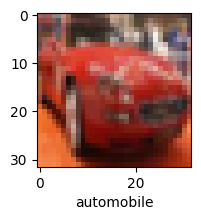

In [10]:
visualize_sample(X_train,y_train,5)

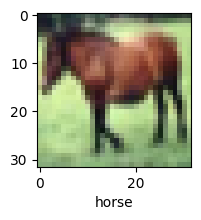

In [11]:
visualize_sample(X_train,y_train,7)

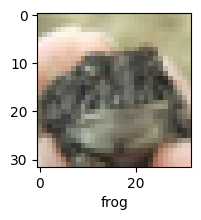

In [12]:
visualize_sample(X_train,y_train,25)

In [13]:
# Scaling
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
# Create ANN
model_ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(2000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

# Compile the model
model_ann.compile(optimizer = 'SGD',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

# Train the model
model_ann.fit(X_train,y_train,epochs = 5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3028 - loss: 1.9390
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4177 - loss: 1.6521
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4507 - loss: 1.5616
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4708 - loss: 1.4935
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4905 - loss: 1.4491


In [15]:
# Evaluate model_ann
model_ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4769 - loss: 1.4589


[1.4659818410873413, 0.4722999930381775]

In [16]:
# Predict using ANN
y_pred = model_ann.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]
y_pred_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(8),
 np.int64(4),
 np.int64(6),
 np.int64(5),
 np.int64(6),
 np.int64(4),
 np.int64(1),
 np.int64(8),
 np.int64(9),
 np.int64(6),
 np.int64(7),
 np.int64(1),
 np.int64(8),
 np.int64(5),
 np.int64(3),
 np.int64(8),
 np.int64(6),
 np.int64(9),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(4),
 np.int64(6),
 np.int64(6),
 np.int64(0),
 np.int64(1),
 np.int64(6),
 np.int64(6),
 np.int64(4),
 np.int64(4),
 np.int64(5),
 np.int64(9),
 np.int64(1),
 np.int64(6),
 np.int64(9),
 np.int64(1),
 np.int64(5),
 np.int64(8),
 np.int64(6),
 np.int64(9),
 np.int64(6),
 np.int64(0),
 np.int64(9),
 np.int64(6),
 np.int64(8),
 np.int64(4),
 np.int64(6),
 np.int64(9),
 np.int64(8),
 np.int64(6),
 np.int64(5),
 np.int64(8),
 np.int64(8),
 np.int64(7),
 np.int64(6),
 np.int64(6),
 np.int64(4),
 np.int64(4),
 np.int64(3),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(2),
 np.int64(8),
 np.int64(2),
 np.int64(3),
 np.int64(9),
 np.int64(4),
 np.in

In [17]:
# Classification Report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.64      0.40      0.49      1000
           1       0.61      0.59      0.60      1000
           2       0.39      0.30      0.34      1000
           3       0.37      0.24      0.29      1000
           4       0.40      0.40      0.40      1000
           5       0.47      0.29      0.36      1000
           6       0.38      0.78      0.51      1000
           7       0.61      0.47      0.54      1000
           8       0.45      0.77      0.57      1000
           9       0.59      0.47      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



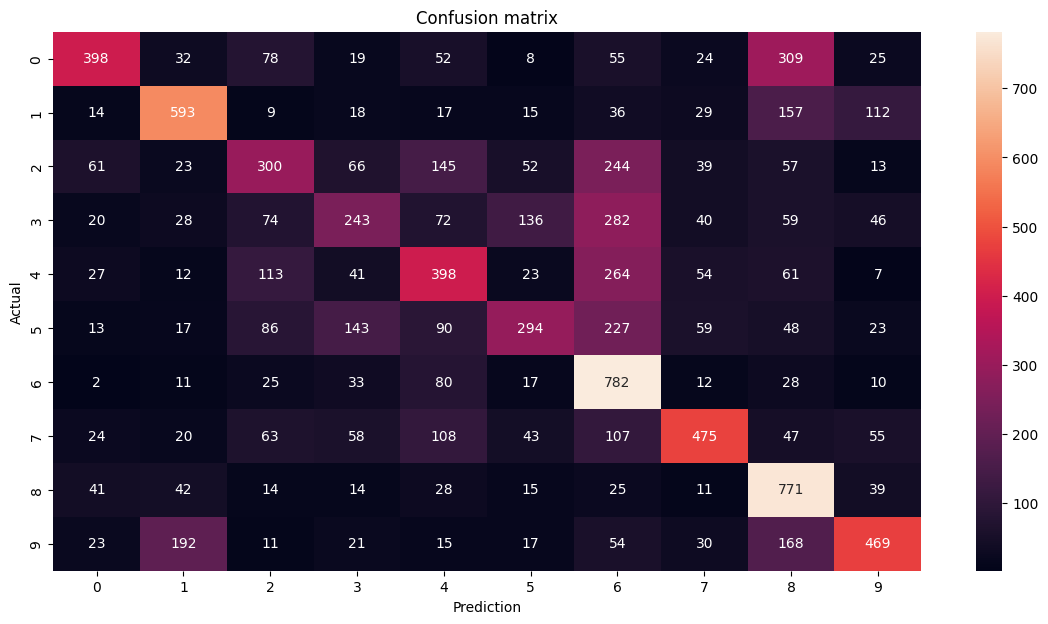

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(14,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [19]:
# Create a CNN model
model_cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_cnn.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

# Train the model
model_cnn.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3395 - loss: 1.8033
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5122 - loss: 1.3626
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5640 - loss: 1.2324
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5902 - loss: 1.1578
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6119 - loss: 1.1049
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6286 - loss: 1.0533
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6344 - loss: 1.0281
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6454 - loss: 0.9964
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6522 - loss: 0.9785
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6561 - loss: 0.9720


In [20]:
# Evaluate model_cnn
model_cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6758 - loss: 0.9176


[0.9187334775924683, 0.675599992275238]

In [21]:
# Predict using model_cnn
y_pred_cnn = model_cnn.predict(X_test)
y_pred_cnn[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.16896210e-03, 9.79728880e-04, 7.26641295e-03, 7.33514726e-01,
        1.38216093e-03, 2.21902922e-01, 2.27742847e-02, 1.38912955e-03,
        7.91384839e-03, 1.70783594e-03],
       [2.00390592e-02, 8.48763287e-02, 2.31540835e-05, 4.26703537e-06,
        5.13860300e-07, 2.91477704e-07, 2.38408632e-07, 3.01421430e-08,
        8.85048449e-01, 1.00076506e-02],
       [9.02506039e-02, 2.01765999e-01, 6.15364593e-03, 2.67287763e-03,
        1.07546686e-03, 8.60472326e-04, 9.93443537e-04, 2.11385995e-04,
        6.42938554e-01, 5.30776270e-02],
       [5.66143632e-01, 1.23218233e-02, 2.51813345e-02, 1.11977721e-03,
        2.75558583e-03, 1.46790742e-04, 2.10043756e-04, 1.67633807e-05,
        3.84931564e-01, 7.17264647e-03],
       [2.88012052e-05, 4.97909787e-04, 1.05267186e-02, 1.45597132e-02,
        3.59277353e-02, 3.23314127e-03, 9.35151160e-01, 1.25306915e-05,
        4.49664076e-05, 1.73875360e-05]], dtype=float32)

In [22]:
# Predicted labels using CNN
y_classes = [np.argmax(i) for i in y_pred_cnn]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

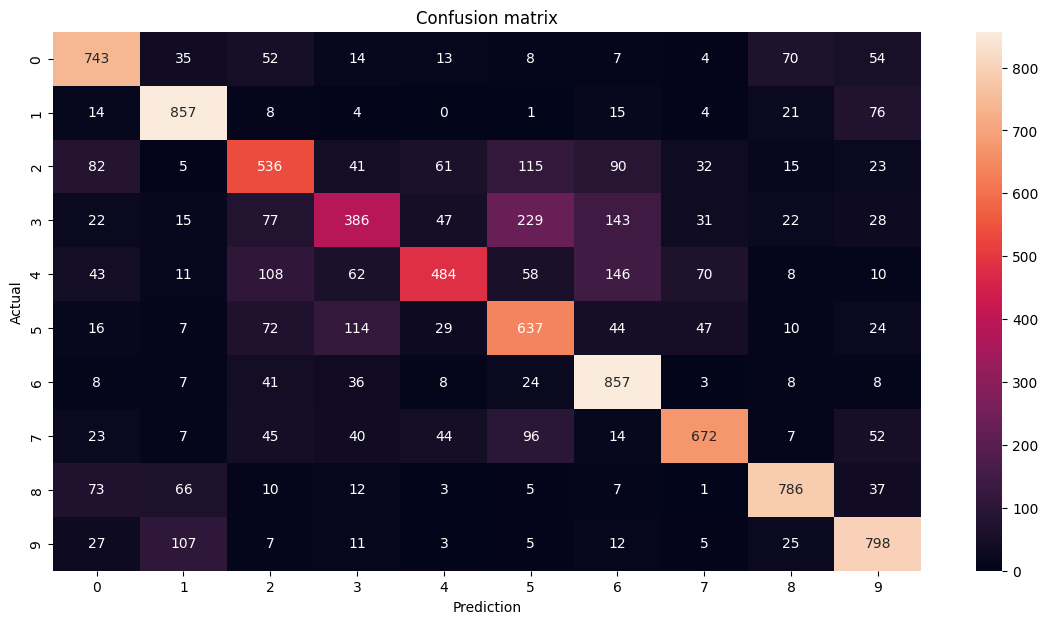

In [23]:
# Confusion matrix of CNN
cm = confusion_matrix(y_test, y_classes)
plt.figure(figsize=(14,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [24]:
# Labels in test set
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

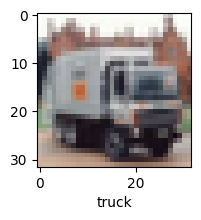

In [25]:
# Visualize the samples in test set
visualize_sample(X_test, y_test, 11)

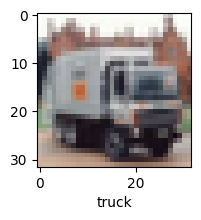

In [26]:
# Check the Predictions are correct
visualize_sample(X_test, y_classes, 11)